# Data Simulation Design 

We are setting up the design in this code to set up the expected variance explained by the covariance between genetic and shared environmental variables. To achieve this, we use theoretical equations used in quantitative genetics. 

First we import the packages needed for the analysis

In [43]:
import math
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

## Set up the functions for the given equations

First equation denoted as m1, where we have no A-C covariance, therefore the total variance is explained is 1

In [5]:
def m1(a2,c2,e2):
    return a2 + c2 + e2

Second equation denoted as m2. The A-C covariance is coming from cultural transmission, but there is no sibling interaction

In [6]:
def m2(a2,e2,c2,g,a,p):
    return p*(2*g+a)**2 + p*a2 + c2 + e2

Third equation denoted as m3. The A-C covariance is coming from sibling interaction that is stemming from parental genetic inheritance. There is no cultural transmission

In [7]:
def m3(a,b,a2,c2,e2,p):
    return p*(a+b)**2 + p*a2 + p*b**2 + c2 + e2

Fourth equation denoted as m4. The A-C covariance is stemming from two sources: cultural transmission and sibling interaction. Here the sibling interaction is based on the parental genetic material that are inherited from the siblings.

In [8]:
def m4(a2,a,c2,e2,b,g,p):
    return p*(2*g+a+b)**2 + p*a2 + p*b**2 + c2 + e2

Fifth equation denoted as m5. The A-C covariance is stemming from the siblings behaviour (sibling interaction).

In [9]:
def m5(a2,c2,e2,x,p):
    return (p*a2)/(x-1)**2 + (p*a2)/(x**2-1)**2 + (p*(x**2*a2))/(x**2-1)**2 + (c2)/(x-1)**2 + (e2)/(x**2-1)**2 + (x**2*e2)/(x**2-1)**2

Sixth equation denoted as m6. The A-C covariance is stemming from two sources: cultural transmission and sibling interaction. Here the sibling interaction is based on feedback loop of one offsprings behaviour has an effect on the other and vica versa.

In [10]:
def m6(a,c,e,x,g,p):
    return (2*g+a)**2/(x-1)**2*1/2+a**2/(-1+x**2)**2*1/2+x**2*a**2/(-1+x**2)**2*1/2+c**2/(x-1)**2*1+1/((-1+x**2)**2)*e**2+x**2/(-1+x**2)**2*e**2

We set up the function that does the calculation based on the values and created a dataframe out of them, so they can be analyzed further. The function can take floats, integers and lists as arguments.

In [11]:
def dataframe_calculation(a2_list,c2_list,e2_list,g_list,b_list,x_list,p):
    # List to store dictionaries
    data = []

    # Iterate over values
    for a2, c2, e2 in zip(a2_values, c2_values, e2_values):
        for g in g_values:
            for b in b_values:
                for x in x_values:
                    a = math.sqrt(a2)
                    c = math.sqrt(c2)
                    e = math.sqrt(e2)
                    if x != 0 and b != 0:
                        res = 'Not used in the analysis'
                    elif g != 0.0 and b == 0 and x == 0:
                        res = m2(a2,e2,c2,g,a,p)
                    elif b != 0.0 and g == 0 and x == 0:
                        res = m3(a,b,a2,c2,e2,p)
                    elif b != 0.0 and g != 0.0 and x == 0:
                        res = m4(a2,a,c2,e2,b,g,p)
                    elif x != 0.0 and g == 0 and b == 0:
                        res = m5(a2,c2,e2,x,p)
                    elif x != 0.0 and g != 0.0 and b == 0:
                        res = m6(a,c,e,x,g,p)
                    else:
                        # Here we have no A-C covariance, so variance stays one
                        res = m1(a2,c2,e2)

                    data.append({'a': a2, 'c2': c2, 'e': e2, 'g': g, 'b': b, 'x': x,
                                 'result': res})

    # Create DataFrame
    return pd.DataFrame(data)

Set up parameters for analysis

In [12]:
a2_values = [0.34, 0.45, 0.25]
c2_values = [0.14, 0.31, 0.4]
e2_values = [0.52, 0.24, 0.35]
g_values = [0, 0.025, 0.05]
b_values = [0, 0.025, 0.05]
x_values = [0, 0.025, 0.05]
#P is 1/2, because there is a 50% chance of each allele to be inherited from one parent
p = 1/2

## Analyzing the given set of parameters

In [14]:
df = dataframe_calculation(a2_values,c2_values,e2_values,g_values,b_values,x_values,p)

In [15]:
df

,a,c2,e,g,b,x,result
0,0.34,0.14,0.52,0.00,0.000,0.000,1.0
1,0.34,0.14,0.52,0.00,0.000,0.025,1.017396
2,0.34,0.14,0.52,0.00,0.000,0.050,1.038687
3,0.34,0.14,0.52,0.00,0.025,0.000,1.015202
4,0.34,0.14,0.52,0.00,0.025,0.025,Not used in the analysis
...,...,...,...,...,...,...,...
76,0.25,0.40,0.35,0.05,0.025,0.025,Not used in the analysis
77,0.25,0.40,0.35,0.05,0.025,0.050,Not used in the analysis
78,0.25,0.40,0.35,0.05,0.050,0.000,1.0875
79,0.25,0.40,0.35,0.05,0.050,0.025,Not used in the analysis


First we purge those parameter sets that are not used in the analysis

In [16]:
used_variance = df[df['result'] != 'Not used in the analysis']
used_variance

,a,c2,e,g,b,x,result
0,0.34,0.14,0.52,0.000,0.000,0.000,1.0
1,0.34,0.14,0.52,0.000,0.000,0.025,1.017396
2,0.34,0.14,0.52,0.000,0.000,0.050,1.038687
3,0.34,0.14,0.52,0.000,0.025,0.000,1.015202
6,0.34,0.14,0.52,0.000,0.050,0.000,1.031655
9,0.34,0.14,0.52,0.025,0.000,0.000,1.030405
10,0.34,0.14,0.52,0.025,0.000,0.025,1.04938
11,0.34,0.14,0.52,0.025,0.000,0.050,1.072376
12,0.34,0.14,0.52,0.025,0.025,0.000,1.046857
15,0.34,0.14,0.52,0.025,0.050,0.000,1.06456


Check the maximum possible variance  variance 

In [17]:
max_variance_by_accov = used_variance['result'].max()
used_variance[used_variance['result'] == max_variance_by_accov]

,a,c2,e,g,b,x,result
47,0.45,0.31,0.24,0.05,0.0,0.05,1.141169


In [18]:
stdev = used_variance['result'].std()
stdev

0.03453025598633679

In [19]:
min_variance = used_variance[used_variance['result'] != 1.0].min()['result']
used_variance[used_variance['result'] == min_variance]

,a,c2,e,g,b,x,result
57,0.25,0.4,0.35,0.0,0.025,0.0,1.013125


Now we check the average variance per parameter setting. Namely what is the average variance when we only have b, x, or g or some mixture of these. To be able to properly visualize the results, I extract 1 from the results.

In [47]:
sib_b = (used_variance[(used_variance['b'] != 0) & (used_variance['g'] == 0) & (used_variance['x'] == 0)]['result'].mean())-1

In [48]:
sib_x = (used_variance[(used_variance['b'] == 0) & (used_variance['g'] == 0) & (used_variance['x'] != 0)]['result'].mean())-1

In [49]:
cult_g = (used_variance[(used_variance['b'] == 0) & (used_variance['g'] != 0) & (used_variance['x'] != 0)]['result'].mean())-1

In [50]:
cult_g_sib_b = (used_variance[(used_variance['b'] != 0) & (used_variance['g'] != 0) & (used_variance['x'] == 0)]['result'].mean())-1

In [51]:
cult_g_sib_x = (used_variance[(used_variance['b'] == 0) & (used_variance['g'] != 0) & (used_variance['x'] != 0)]['result'].mean())-1

We can expect that the largest cov(A,C) effects will come from cultural transmission, while sibling interaction from each source has a rather smaller effect. We can also expect the x effect to take up larger part of the standardized total variance then b

([<matplotlib.axis.XTick at 0x120e90970>,
 [Text(0, 0, 'sib_b'),
  Text(1, 0, 'sib_x'),
  Text(2, 0, 'cult_g'),
  Text(3, 0, 'cult_g_sib_b'),
  Text(4, 0, 'cult_g_sib_x')])

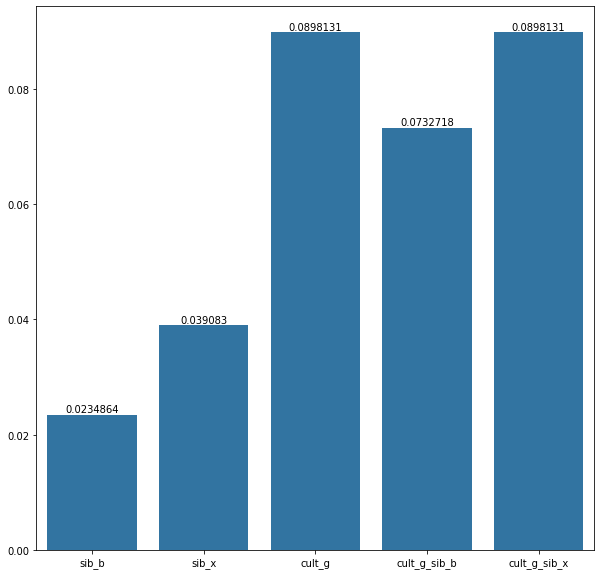

In [52]:
plt.figure(figsize=(10,10))
ax = sns.barplot([sib_b,sib_x,cult_g,cult_g_sib_b,cult_g_sib_x])
ax.bar_label(ax.containers[0])
plt.xticks(np.arange(0,5,step = 1),labels = ['sib_b','sib_x','cult_g','cult_g_sib_b','cult_g_sib_x'])